# Assignment 6 - Eye tracking data exploration

In [128]:
# import the library
import numpy as np
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 200)

In [4]:
!pip install openpyxl


## Exercise 11 – Eye Tracking Data

In our Google Drive folder you can find an eye tracking dataset recorded in a real eye tracking study. 

The study itself got explained in the lecture (Chapter 5). The focus was on public transport maps and the
research question which type of maps is better: colored or grayscale ones? Explore the given dataset and
describe the following points in detail:
(a) How many participants took part in the study? (3 P.) - 40
(b) How many stimuli have been shown in the study and what is their difference? (3 P) - 106, difference in the city (diffciculty) and the color (colored and greyscale)
(c) How many fixations have been made in the study in total? (3 P.) 
(d) Which general differences can you detect in the individual scanpaths? (3 P.)

In [55]:
# data import
import os.path
rootPath = os.getcwd();
fixation_data = "all_fixation_data_cleaned_up.csv"

df = pd.read_csv(os.path.join(rootPath, fixation_data), encoding= 'unicode_escape')
df.head(3)

,Timestamp,StimuliName,FixationIndex,FixationDuration,MappedFixationPointX,MappedFixationPointY,user,description
0,2586,01_Antwerpen_S1.jpg,9,250,1151,458,p1,color
1,2836,01_Antwerpen_S1.jpg,10,150,1371,316,p1,color
2,2986,01_Antwerpen_S1.jpg,11,283,1342,287,p1,color


In [56]:
# 11-a
print('Unique partcipant ID number in dataset is',
      '\n',
      len(df.user.unique()))

Unique partcipant ID number in dataset is 
 40


In [57]:
# 11-b
print('Unique Stimuli number in dataset is',
      '\n',
      len(df.StimuliName.unique()))

Unique Stimuli number in dataset is 
 96


In [59]:
# 11-c
len(df)

118126

## Exercise 12 – Patterns and Anomalies in Eye Tracking Data

Imagine you have an eye tracking dataset and all information about the study design and how the study
was conducted. How could you explore the recorded data for patterns and anomalies? (2 P.) Find good
statistics tools or do you already know some of them, to explore the data? (2 P.) Describe your process to
let the data speak, i.e. to make them understandable. (4 P.) 

Hint: You do not have to apply real analyzes
in this exercise, we are only interested in the concrete method. Just in case you like to explore the data
you are allowed to do that. (You can earn 2 extra points for that).

### Exercise 12 – EDA

In [60]:
# 12.1 Getting fixation count and duration in Color VS Grey

In [66]:
df_Antwerpen = df[df['StimuliName'].str.contains("Antwerpen")]

In [80]:
df_Antwerpen_color =  df_Antwerpen[df_Antwerpen['description']=="color"]
df_Antwerpen_gray =  df_Antwerpen[df_Antwerpen['description']=="gray"]


In [108]:
fixation_count_gray = df_Antwerpen_gray.groupby("user")["Timestamp"].count()
fixation_count_gray = pd.DataFrame({'User':fixation_count_gray.index, 'CountGray':fixation_count_gray.values})


,User,CountGray
0,p1,33
1,p10,45
2,p11,19
3,p12,23
4,p13,26


In [107]:
fixation_count_color= df_Antwerpen_color.groupby("user")["Timestamp"].count()
fixation_count_color = pd.DataFrame({'User':fixation_count_color.index, 'CountColor':fixation_count_color.values})
fixation_count_color.head(5)

,User,CountColor
0,p1,14
1,p10,38
2,p11,114
3,p12,20
4,p13,23


In [114]:
fixation_duration_gray = df_Antwerpen_gray.groupby("user")["FixationDuration"].mean()
fixation_duration_gray = pd.DataFrame({'User':fixation_duration_gray.index, 'durationGray':fixation_duration_gray.values})
fixation_duration_gray.head(5)

,User,durationGray
0,p1,320.303030
1,p10,371.200000
2,p11,369.000000
3,p12,314.043478
4,p13,267.153846


In [115]:
fixation_duration_color = df_Antwerpen_color.groupby("user")["FixationDuration"].mean()
fixation_duration_color = pd.DataFrame({'User':fixation_duration_color.index, 'durationColor':fixation_duration_color.values})
fixation_duration_color.head(5)

,User,durationColor
0,p1,292.642857
1,p10,285.710526
2,p11,325.271930
3,p12,278.900000
4,p13,273.652174


In [117]:
pd_fixation_merge = (pd.merge(fixation_count_gray, fixation_count_color, on='User'))
pd_fixation_merge.head(5)

,User,CountGray,CountColor
0,p1,33,14
1,p10,45,38
2,p11,19,114
3,p12,23,20
4,p13,26,23


In [119]:
pd_fixation_merge.to_excel(os.path.join(rootPath, 'pd_fixation_merge.xlsx'), index=False)


In [120]:
pd_duration_merge.to_excel(os.path.join(rootPath, 'pd_duration_merge.xlsx'), index=False)


In [118]:
pd_duration_merge = (pd.merge(fixation_duration_gray, fixation_duration_color, on='User'))
pd_duration_merge.head(5)

,User,durationGray,durationColor
0,p1,320.303030,292.642857
1,p10,371.200000,285.710526
2,p11,369.000000,325.271930
3,p12,314.043478,278.900000
4,p13,267.153846,273.652174


In [125]:
df_compare = pd.read_excel(os.path.join(rootPath, 'ColorModeComparasion.xlsx'), sheet_name='Sheet1')
df_compare.head(5)

,User,Count,ColorMode,DurationMean
0,p1,33,Gray,320.303030
1,p10,45,Gray,371.200000
2,p11,19,Gray,369.000000
3,p12,23,Gray,314.043478
4,p13,26,Gray,267.153846


In [130]:
# import the library
import numpy as np
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="ticks")

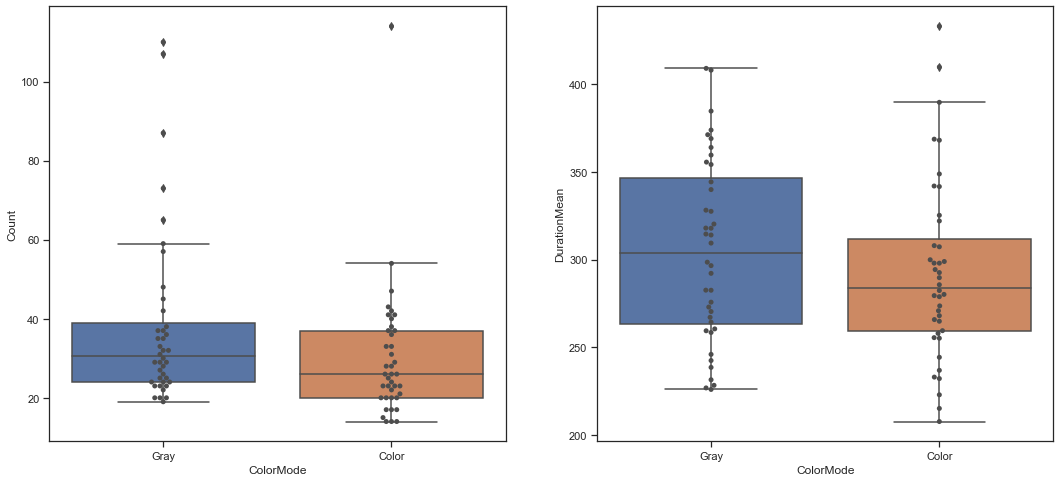

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2,figsize=(18,8))
matplotlib.rcParams["figure.dpi"] = 220

sns.boxplot(data=df_compare, x="ColorMode", y="Count", ax=axs[0])
sns.swarmplot(data=df_compare, x="ColorMode", y="Count", ax=axs[0], color=".3")

sns.boxplot(data=df_compare, x="ColorMode", y="DurationMean", ax=axs[1])
sns.swarmplot(data=df_compare, x="ColorMode", y="DurationMean", ax=axs[1], color=".3")

plt.show()

## Statis Check 

In [133]:
import scipy.stats as stats


In [140]:
grouped_multiple = df_compare.groupby('ColorMode').agg({'Count': ['mean','std', 'min', 'max']})
grouped_multiple.columns = ['Mean','SD', 'Min', 'Max']
grouped_multiple = grouped_multiple.reset_index()
print('Fixation Count', '\n',grouped_multiple.round(3))

Fixation 
   ColorMode    Mean      SD  Min  Max
0     Color  30.050  16.910   14  114
1      Gray  38.225  22.244   19  110


In [142]:
grouped_multiple = df_compare.groupby('ColorMode').agg({'DurationMean': ['mean','std', 'min', 'max']})
grouped_multiple.columns = ['Mean','SD', 'Min', 'Max']
grouped_multiple = grouped_multiple.reset_index()
print('DurationMean', '\n',grouped_multiple.round(3))

DurationMean 
   ColorMode     Mean      SD      Min      Max
0     Color  292.676  51.685  207.765  433.027
1      Gray  305.131  52.138  226.053  409.000


In [134]:
stats.ttest_ind(df_compare['Count'][df_compare['ColorMode'] == 'Gray'],
                df_compare['Count'][df_compare['ColorMode'] == 'Color'])


Ttest_indResult(statistic=1.8503949514655584, pvalue=0.06804317872235398)

In [135]:
stats.ttest_ind(df_compare['DurationMean'][df_compare['ColorMode'] == 'Gray'],
                df_compare['DurationMean'][df_compare['ColorMode'] == 'Color'])


Ttest_indResult(statistic=1.073029340740371, pvalue=0.28656651294571794)